In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics as st

In [2]:
k=3

In [3]:
df = pd.read_csv('cluster_actuator.csv',header=None)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,0,1
0,47847.11836,16.747962
1,121812.74780,19.443298
2,71569.12026,22.036053
3,74878.94740,25.276017
4,98939.78638,19.783987


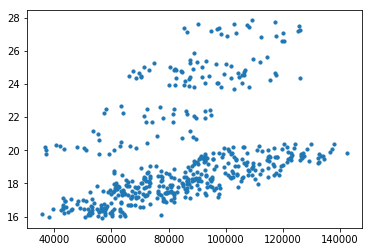

<Figure size 432x288 with 0 Axes>

In [6]:
plt.scatter(df[0],df[1], s=10, cmap = 'cool')
plt.show()
plt.savefig('q1initial.png')

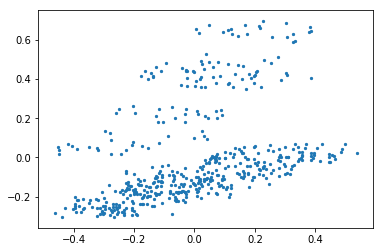

In [7]:
data = df.values
a=(max(data[:,0])-min(data[:,0]))
b=(max(data[:,1])-min(data[:,1]))
am=(sum(data[:,0])/len(data[:,0]))
bm=(sum(data[:,1])/len(data[:,1]))
data[:,0]=(data[:,0]-(sum(data[:,0])/len(data[:,0])))/(max(data[:,0])-min(data[:,0]))
data[:,1]=(data[:,1]-(sum(data[:,1])/len(data[:,1])))/(max(data[:,1])-min(data[:,1]))
data
plt.scatter(data[:,0],data[:,1],s=5)
plt.show()

In [8]:
arr = np.arange(len(df))
np.random.shuffle(arr)
seeds=[]
for x in arr[0:k]:
    seeds.append(data[x])
print(seeds)

[array([ 0.07677199, -0.09136805]), array([-0.14723827, -0.14887687]), array([-0.08048348, -0.17935646])]


In [9]:
def distance(a,b):
    return ((a[0]-b[0])**(2)+(a[1]-b[1])**(2))**(0.5)
def cmpare(a,b):
    s=0
    if len(a)==0 or len(b) == 0:
        return 1
    for x in range(len(a)):
        s+=distance(a[x],b[x])
    return s


In [10]:
new_seeds=[]
while(cmpare(new_seeds,seeds) >1e-20):
    if len(new_seeds)!=0:
        seeds=new_seeds
        new_seeds=[]
    clusters=[]
    for s in range(k):
        clusters.append([0,0,0])
    for y in data:
        temp=[]
        for x in seeds:
            temp.append(distance(x,y))
        m=temp.index(min(temp))
        clusters[m][0]+=y[0]
        clusters[m][1]+=y[1]
        clusters[m][2]+=1
    new_seeds=[]
    for x in clusters:
        temp=[]
        temp.append(x[0]/x[2])
        temp.append(x[1]/x[2])
        new_seeds.append(temp)
    print(new_seeds[1][0],new_seeds[1][1])


-0.23747475002290003 -0.14849582072288703
-0.26203634454747565 -0.16882622269881753
-0.26048046186353563 -0.17493987412262574
-0.25227461116944155 -0.1751795532602642
-0.23896114314200784 -0.16991681337765166
-0.22277111035521344 -0.1709845051874667
-0.2022553513825853 -0.16916365544166573
-0.19796381019944798 -0.16812512801948085
-0.1920659356228655 -0.16574142511623638
-0.1892687149550717 -0.1658018750597428
-0.18833895630346423 -0.16575581196068534
-0.18833895630346423 -0.16575581196068534


In [11]:
new_seeds

[[0.07413949271185075, 0.43145627407748954],
 [-0.18833895630346423, -0.16575581196068534],
 [0.18754523703645276, -0.040425338124644224]]

In [12]:
c=[]
for x in data:
    temp=[]
    for y in seeds:
        temp.append(distance(x,y))
    m=temp.index(min(temp))
    c.append(m)
df['c']=c


In [13]:
a

106497.45247999995

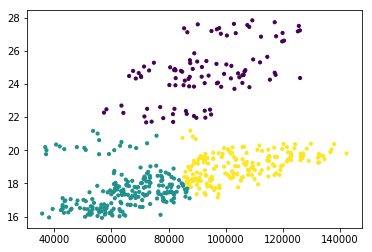

In [14]:
plt.scatter(df[0]*a+am, df[1]*b+bm, c=df['c'], s=10)
plt.show()